In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [83]:
import numpy as np
import pandas as pd
import sys # 최대정수
from tensorflow.keras.utils import to_categorical # 분류분석시 y데이터 원핫인코딩
from tensorflow.keras.models import Sequential # 모델 객체 생성
from tensorflow.keras.layers import Input, Dense # 모델 layer 쌓을 때 필요
from tensorflow.keras.models import save_model, load_model # 모델 저장, 로드
import matplotlib.pyplot as plt

# 로디스틱 회귀분석(이진분류)

## 1. 데이터 셋 생성 & 전처리

In [2]:
# 1. csv파일을 데이터프레임으로 읽어오기(결측치처리, 결측치 대체 용이. 균형 확인 용이.) 기본 encoding utf-8

df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.head()
# 0. 임신횟수
# 1. 2시간내 포도당 농도
# 2. 혈압
# 3. 피부접힘 두께
# 4. 인슐린수치
# 5. BMI체질량지수
# 6. 가족력
# 7. 나이
# 8. 당뇨병발병여부

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isna().sum() # 열별 결측치 갯수

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [13]:
# 타겟변수의 균형 확인 1:9, 2:8 정도는 학습이 잘 안됨

df[8].value_counts()/len(df)*100

0    65.104167
1    34.895833
Name: 8, dtype: float64

In [14]:
df.values
#df.to_numpy()

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [26]:
# 2. csv파일을 numpy 배열로 읽어오기(결측치 처리 불편. 잘 쓰지 않음) 기본 encoding cp949
# np.loadtxt() 는 기본적으로 #이 있는 행은 제외하고 가져옴. comment='#'를 할필요없음

dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',', encoding='utf-8')
dataset.shape

(768, 9)

In [27]:
# 데이터 분할 : 학습데이터셋(모델학습용) + 시험데이터셋(모델평가용)
# 안섞고 분할 : 살짝 위험할 수 있음. 당뇨병 환자가(종속변수) 몰려있을 수 있기때문

X_train = dataset[:620, :-1] # 맨 뒤에 종속변수 제외. 전체 데이터의 약 80%
y_train = dataset[:620, -1]
X_test = dataset[620:, :-1]
y_test = dataset[620:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((620, 8), (620,), (148, 8), (148,))

## 2. 모델구성

In [44]:
model = Sequential()

# 한번에 하는것도 가응
# model.add(Dense(units=32, input_shape=(8,), # 1차원일경우 input_dim=8 가능
#                activation='relu'))

# 바꾸면 안되는것 : 입력층에 8, 마지막 출력층에 1, sigmoid
model.add(Input(shape=(8,))) 
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                288       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [45]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy']) 그냥 accuracy만 써도 가능. 정석은 binary_accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. 학습

In [46]:
%%time

hist = model.fit(X_train, y_train, # 훈련데이터셋(학습데이터셋)
                epochs=200, batch_size=310, # train데이터가 620개. 한번에 가져오면 메모리가 부족할 수 있으니 나눠둠. 메모리상태에 따라 두기도하고 안두기도함
                # validation_data=(X_test, y_test) 검증데이터 넣는것인데 우리는 지금 따로 검증데이터를 만들지 않았음
                validation_split=0.1, # 검증데이터 비율(훈련데이터 620개중 10%를 검증용 데이터로 쓰겠다)
                verbose=0) # 로그출력X

CPU times: total: 4.75 s
Wall time: 4.49 s


In [17]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 5. 모델 평가하기

- 학습과정 시각화하여 살펴보기
- 평가
- 교차표(혼동 매트릭스, 성능평가지표) 그리기

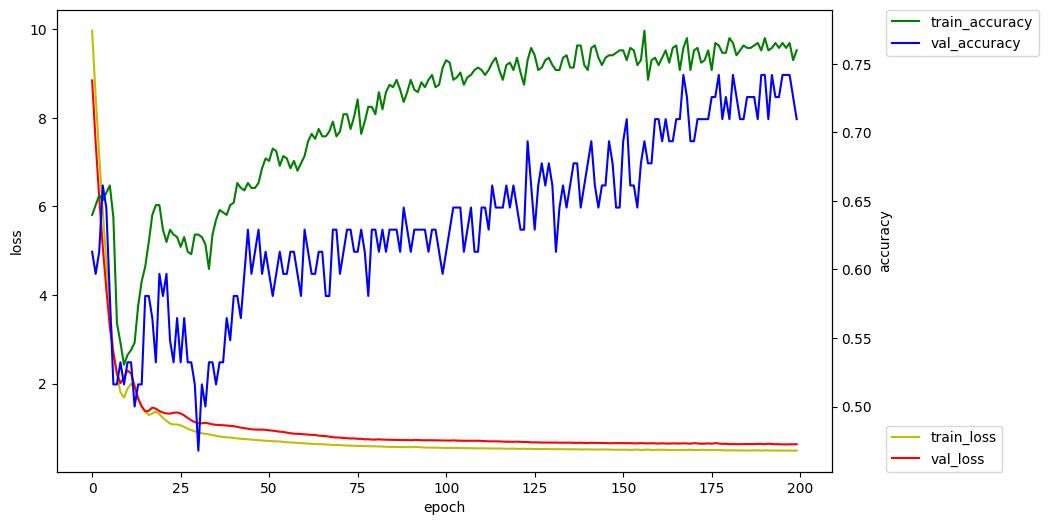

In [47]:
# 학습과정 표시하기

fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(bbox_to_anchor=(1.07, 0.1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.07, 1), loc=2, borderaxespad=0.)
plt.show()

In [49]:
# 모델 평가(X)

model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.7565


[0.5003999471664429, 0.7564516067504883]

In [53]:
# 모델 평가(O)

score = model.evaluate(X_test, y_test)
print('loss : {}, 정확도 : {:.2f}%'.format(score[0], score[1]*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.6645 - accuracy: 0.6554
loss : 0.6644945740699768, 정확도 : 65.54%


교차표(혼동 매트릭스, 성능평가지표)
<!-- ![image](https://velog.velcdn.com/images/leehb9360/post/7eb8ca12-94be-40ed-b7a4-b9e9701a93df/image.png) -->
<img src="https://velog.velcdn.com/images/leehb9360/post/7eb8ca12-94be-40ed-b7a4-b9e9701a93df/image.png" width='500' align="left">

In [56]:
# 교차표(혼동 매트릭스, 성능평가지표) 그리기 : 테스트셋의 실제값과 예측값

# 실제값(1차원)
y_test 

# 예측값(2차원)
y_hat = (model.predict(X_test) >= 0.5).astype(int)

5/5 [==============================] - 0s 1ms/step


In [58]:
# 라이브러리를 이용하지 않고 수동으로 만드는것

TN = 0; FP=0; FN=0; TP=0; # 각각 갯수를 담을 그릇
for y, h in zip(y_test, y_hat.reshape(-1)): # y_hat이 2차원이다보니 바꿔야함. 몇열인지 모르겠고 바꿔라라는말
    # print(y,h)
    if y==0 and h==0:
        TN += 1 # TN갯수 하나 증가
    elif y==0 and h==1:
        FP += 1
    elif y==1 and h==0:
        FN += 1
    else:
        TP += 1
print(TN, FP)
print(FN, TP)

73 23
28 24


In [62]:
# 라이브러리 사용

ctab = pd.crosstab(y_test, y_hat.reshape(-1)) # 둘다 1차원으로 넣어야함
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0,1
실제값,,
0.0,73,23
1.0,28,24


In [63]:
# 한큐에 하는 방법 : 결과가 데이터 프레임인 교차표

pd.crosstab(y_test,            # 실제값
            y_hat.reshape(-1), # 예측값
           rownames=['실제값'], # 인덱스 이름
           colnames=['예측값']) # 컬럼 이름

예측값,0,1
실제값,,
0.0,73,23
1.0,28,24


In [64]:
# skearn으로 하는것 : 결과가 numpy배열인 혼동행렬

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat) # 이건 y_hat.reshape(-1) 둘다 가능

array([[73, 23],
       [28, 24]], dtype=int64)

## 6. 모델 사용( 예측, 저장)

In [70]:
X_test[2]

array([  6.   , 183.   ,  94.   ,   0.   ,   0.   ,  40.8  ,   1.461,
        45.   ])

In [68]:
(model.predict([[2.   , 112.   ,  86.   ,  42.   , 160.   ,  38.4  ,   0.246, 28.]]) > 0.5).astype(int)

1/1 [==============================] - 0s 30ms/step


array([[0]])

In [71]:
(model.predict([[2.   , 112.   ,  86.   ,  42.   , 160.   ,  38.4  ,   0.246, 28.],
               [ 6.   , 183.   ,  94.   ,   0.   ,   0.   ,  40.8  ,   1.461, 45.   ]]) > 0.5).astype(int)

1/1 [==============================] - 0s 27ms/step


array([[0],
       [0]])

In [75]:
# 방법1
model.save('model/06binary.h5')

# 방법2
save_model(model, 'model/06binary.h5')

In [76]:
model2 = load_model('model/06binary.h5')

In [77]:
(model2.predict([[2.   , 112.   ,  86.   ,  42.   , 160.   ,  38.4  ,   0.246, 28.]]) > 0.5).astype(int)

1/1 [==============================] - 0s 50ms/step


array([[0]])

# 분류분석

- 1. 데이터셋 생성 & 전처리 : 훈련셋(600개), 검증셋(100개), 테스트셋(68개)으로 분리, 타겟변수의 원핫인코딩
- 2. 모델생성(input 8, output2) : 출력층의 활성화함수 : 'softmax'
- 3. 모델 학습 과정 loss='categorical_crossentropy' metrics=['accuracy']
- 4. 모델 학습 validation_data = [X_var, Y_val] (검증데이터셋)
- 5. 모델 학습 평가
- 6. 모델 사용 - 예측시 argmax() 함수 활용

## 1. 데이터셋 생성 & 전처리

In [79]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [81]:
# 훈련셋(600개), 검증셋(100개), 테스트셋(68개)

X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
X_val   = dataset[600:700, :-1]
y_val   = dataset[600:700, -1]
X_test  = dataset[700:, :-1]
y_test  = dataset[700:, -1]

X_train.shape, y_train.shape, X_val.shape, y_train.shape, X_test.shape, y_test.shape

((600, 8), (600,), (100, 8), (600,), (68, 8), (68,))

In [88]:
# 분류 분석을 위한 타겟(종속)변수의 원핫인코딩

Y_train = to_categorical(y_train)
Y_val   = to_categorical(y_val)
Y_test  = to_categorical(y_test)

Y_train.shape, Y_val.shape, Y_test.shape

((600, 2), (100, 2), (68, 2))

In [86]:
print('원 데이터', y_train[0]) # 종속변수 1개이던걸 원핫인코딩하면서 2개로 나뉠거임. 그래서 위에 대분자 Y
print('원핫인코딩 데이터 : \n', Y_train[:3])

원 데이터 1.0
원핫인코딩 데이터 : 
 [[0. 1.]
 [1. 0.]
 [0. 1.]]


## 2. 모델생성(input8, output2)

In [105]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                288       
                                                                 
 dense_41 (Dense)            (None, 16)                528       
                                                                 
 dense_42 (Dense)            (None, 2)                 34        
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [106]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [107]:
%%time
hist = model.fit(X_train, Y_train, epochs=200, validation_data=(X_val, Y_val), verbose=0)

CPU times: total: 9.61 s
Wall time: 7.77 s


## 5. 모델 평가하기

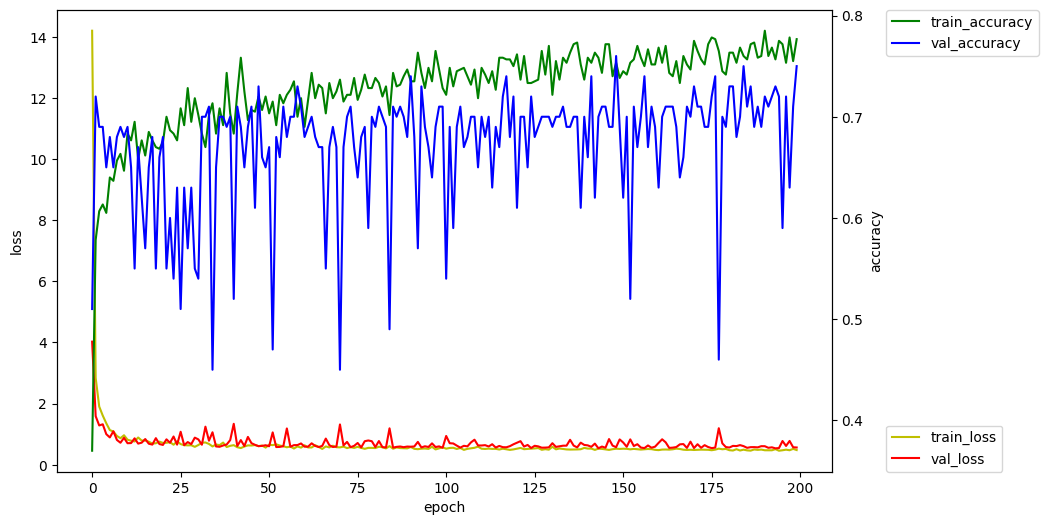

In [108]:
# 학습과정 표시하기

fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(bbox_to_anchor=(1.07, 0.1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.07, 1), loc=2, borderaxespad=0.)
plt.show()

In [109]:
# 모델 평가

model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.6912


[0.5931590795516968, 0.6911764740943909]

In [111]:
# 혼동행렬, 교차표 (원핫인코딩을 다시 복구)

# 실제값
y_test 

# 예측값
y_hat = model.predict(X_test).argmax(axis=1) # 어떤 열이 더 크니?

3/3 [==============================] - 0s 997us/step


In [112]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1
실제값,,
0.0,38,3
1.0,18,9


In [113]:
confusion_matrix(y_test, y_hat)

array([[38,  3],
       [18,  9]], dtype=int64)

## 6. 모델 사용하기

In [114]:
X_test[0]

array([  2.   , 122.   ,  76.   ,  27.   , 200.   ,  35.9  ,   0.483,
        26.   ])

In [118]:
pred = model.predict(X_test[0].reshape(-1,8)) # 2차원으로 넣어야해서 8열짜리를 1행 8열짜리로 만든것
pred.argmax(axis=1)

1/1 [==============================] - 0s 16ms/step


array([0], dtype=int64)